# IMPORTING THE NECESSARY LIBRARIES

In [6]:
!pip install numpy==1.21


In [1]:
!pip install geocoder
!pip install geopy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from geopy import distance
from geopy.distance import geodesic
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

By looking at the data head and their data types the following changes needs to be done for the data types of the varibales:
--

vendor_id should be a category instead of integer as we could see only 2 values of vendor_id 1 and 2, representing a unique id   for both the vendors

The pickup_datetime and dropoff_datetime are identified as objects, so that needs to be changes to a datetime formart

The passenger_count can also be treated as a category instead of integer as it represents no of people on the trip which ranges between 1 to 9, so we can analyse the no.of trips for each category between 1 to 9 number of passengers

store_and_fwd_flag is also identified as object which needs to be changed to category as it has 2 values Y and N


In [7]:
data['vendor_id']=data['vendor_id'].astype('category')

In [8]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])

In [9]:
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [10]:
data['passenger_count']=data['passenger_count'].astype('category')

In [11]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [12]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [13]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

The data does not contain any missing values however there can be outliers present

To have a look at it we can make use of the data.describe()

In [14]:
data.describe()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
min,2016-01-01 00:01:14,2016-01-01 00:05:54,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2016-06-30 23:59:37,2016-07-01 23:02:03,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06
std,NaN,NaN,0.069754,0.033594,0.069588,0.036037,3.864626e+03


By having a look at it we can see that our target varibale trip_duration can have plenty of outlier, its value ranges from 1 seconds to 1939736 so the target variable may not be normally distributed

On the contrary the variables such as pickup_longitude,pickup_latitude,dropoff_longitude, dropoff_latitude does not have a wide range 

We'll look at these variables in detail and visually later in the analysis

The pickup_datetime and dropoff_datetime variables can be used to extract more informations regarding the day of each trip such as:
--

Which day was the pickup done-->pickup_day

Which day was the dropoff done-->dropoff_day

The month of each pickup-->pickup_month

The month of each dropoff-->dropoff_month

The pickup hour of the day-->pickup_hour_of_day

The dropoff hour of the day-->dropoff_hour_of_day



In [15]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()

In [16]:
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

In [17]:
pickup_date = pd.DatetimeIndex(data['pickup_datetime'])
dropoff_date=pd.DatetimeIndex(data['dropoff_datetime'])

In [18]:
data['pickup_month'] = pickup_date.month
data['dropoff_month']=dropoff_date.month

In [19]:
data['pickup_hour_of_day'] = data['pickup_datetime'].dt.hour

In [20]:
data['dropoff_hour_of_day'] = data['dropoff_datetime'].dt.hour

All of the above variables are crated using the datetime function and added to our dataset

We can also make use of the latitude and longitude coordinates of both pickup and dropoff location to calculate the distance travelled during the trips
--
However the distance calculated here will be the straight line distance bewtween the pickup and dropoff locations

The average speed of the taxi can also be calculated with the help of distance and the trip_duration which can be insightful
--


In [21]:
data['distance'] = data.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                                   (row['dropoff_latitude'], row['dropoff_longitude'])).miles,axis=1)

In [22]:
data['speed_mph'] = data['distance'] / (data['trip_duration'] / 3600)

In [23]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour_of_day,dropoff_hour_of_day,distance,speed_mph
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,2,2,16,16,0.745502,6.709522
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,3,3,23,23,2.562501,8.386366
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,2,2,17,18,4.505212,9.919733
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10,1.465371,4.623433
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2.689391,11.417226


In [24]:
data[['distance','speed_mph']].describe()

,distance,speed_mph
count,729322.000000,729322.000000
mean,2.139048,8.962851
std,2.707108,7.669928
min,0.000000,0.000000
25%,0.766246,5.671453
50%,1.302440,7.953215
75%,2.408328,11.087759
max,770.817337,3503.715166


The distance and speed_mph variables also have a wide range of values which means that both of these variables also contains outliers. We will take a look on it visually further

# Univariate Analysis

for categorical features

In [25]:
data['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

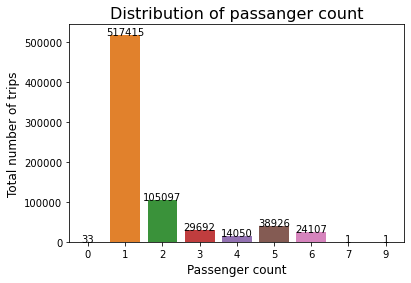

In [26]:
ax=sns.countplot(x=data['passenger_count'])
plt.title('Distribution of passanger count',size=16)
plt.xlabel('Passenger count',size=12)
plt.ylabel('Total number of trips',size=12)

for p in ax.patches:
    height= p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))
plt.show()

As discussed initially we have converted the passenger_count variable into category and the distribution of each category is
respresented above graphically. This representation clearly indicates that:

--The maximum number of trips done through NYC taxi are solo i.e. only 1 passenger, followed by 2 and 5

--This clearly means that maximum business of NYC taxi is done through solo trips, which is good from abusiness point of        view but it can be changed with the help of carpool to reduce the number of cars as well


--There are some trips with number of passengers as 7 & 9 as well which maybe the case for bigger cars such as Limousine or a Van 

In [27]:
data['pickup_datetime'].min(), data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

Based on the above outcome it is clear that the dataset contains the data for the first six months
--

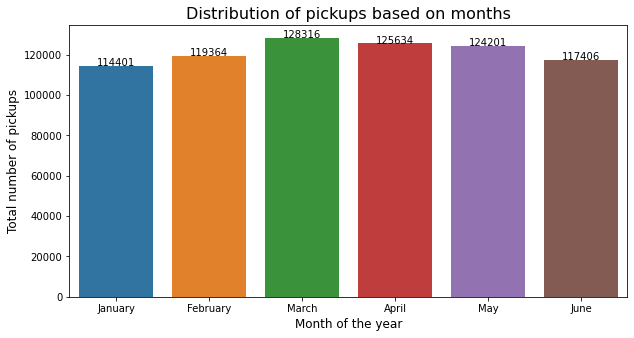

In [28]:
plt.figure(figsize=(10,5))

ax=sns.countplot(data['pickup_month'])
plt.title('Distribution of pickups based on months',size=16)
plt.xlabel('Month of the year',size=12)
plt.ylabel('Total number of pickups',size=12)

month_order = ['January', 'February', 'March', 'April', 'May', 'June']
ax.set_xticklabels(month_order)

for p in ax.patches:
    height= p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))


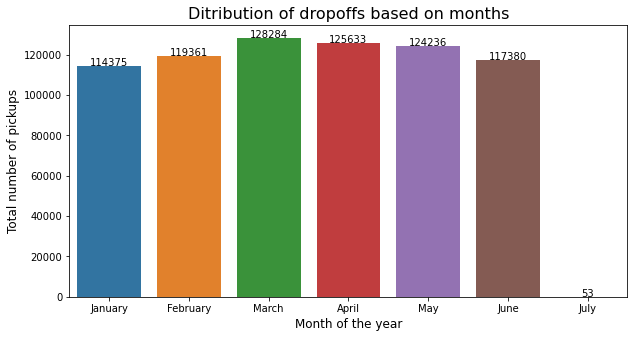

In [29]:
plt.figure(figsize=(10,5))

ax=sns.countplot(x='dropoff_month',data=data)
ax.set_title('Ditribution of dropoffs based on months',size=16)
plt.xlabel('Month of the year',size=12)
plt.ylabel('Total number of pickups',size=12)

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July']

ax.set_xticklabels(month_order)
for p in ax.patches:
    height= p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))


In [30]:
data['dropoff_datetime'].min(), data['dropoff_datetime'].max()

(Timestamp('2016-01-01 00:05:54'), Timestamp('2016-07-01 23:02:03'))

The month of March and April have the highest number of pickups and dropoffs

The dropoff months actually include the month of July as well, this may be the case for the long trips where the trip started on 30th june and ended the next day on 1st of July which can be confirmed based on the outcome of the above cell

In [31]:
data['pickup_day'].value_counts()

pickup_day
Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: count, dtype: int64

In [32]:
data['dropoff_day'].value_counts()

dropoff_day
Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: count, dtype: int64

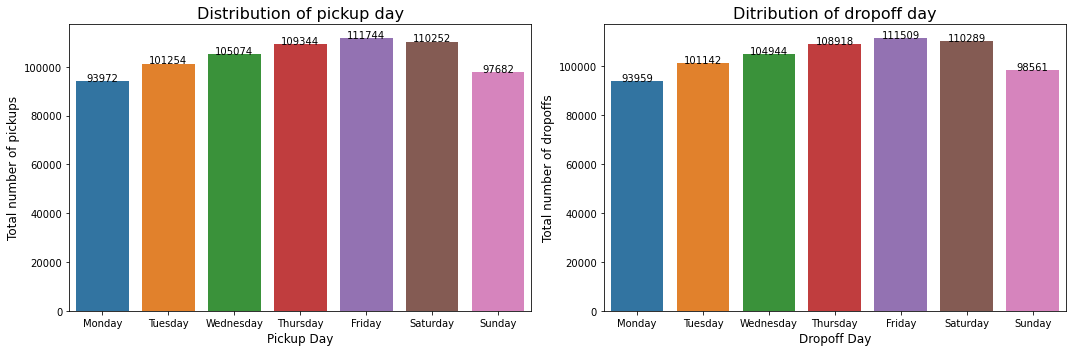

In [33]:
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
sns.countplot(x='pickup_day',data=data, order=days_order, ax= ax[0])
ax[0].set_title('Distribution of pickup day',size=16)
ax[0].set_xlabel('Pickup Day',size=12)
ax[0].set_ylabel('Total number of pickups',size=12)
for p in ax[0].patches:
    height= p.get_height()
    ax[0].text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))


sns.countplot(x='dropoff_day',data=data,order=days_order, ax= ax[1])
ax[1].set_title('Ditribution of dropoff day',size=16)
ax[1].set_xlabel('Dropoff Day',size=12)
ax[1].set_ylabel('Total number of dropoffs',size=12)
for p in ax[1].patches:
    height= p.get_height()
    ax[1].text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))

plt.tight_layout()

The Ditribution of pickup_day and dropoff_day states that
--

--The maximum number of trips done are on friday and saturday with not much difference, this tells us that a lot of business is made on the weekends(fridays & saturdays) as people use taxis to move around during their weekend plans. For instance a person can make plans for the weekend and use the taxi on friday right after their office hours to have a long weekend   


--However the number of trips on sunday is quite less, this could be because more people prefer to stay at home on sundays for their holiday


--There is clearly a pattern here, as the number of trips increases gradually towards the weekend except on sunday

With the help of Pickup_datetime and dropoff_datetime we have also created a set of new variables pickup_time and dropoff_time,that reprensts the time of both the pickup and drop
--
The time is allocated in the following way:


0 to 4 hours hours-->Past Midnight

4 to 12 hours--> Morning

12 to 17 hours-->Afternoon

17 to 21 hours-->Evening

21 to 24 hours--> Night


In [34]:
bins = [0, 4, 12, 17, 21, 24]
labels = ['Past Midnight', 'Morning', 'Afternoon', 'Evening','Night']

data['pickup_time'] = pd.cut(data['pickup_datetime'].dt.hour, bins=bins, labels=labels, right=False)
data['dropoff_time'] = pd.cut(data['dropoff_datetime'].dt.hour, bins=bins, labels=labels, right=False)

In [35]:
data[['pickup_datetime','pickup_time','dropoff_datetime','dropoff_time']].head()

,pickup_datetime,pickup_time,dropoff_datetime,dropoff_time
0,2016-02-29 16:40:21,Afternoon,2016-02-29 16:47:01,Afternoon
1,2016-03-11 23:35:37,Night,2016-03-11 23:53:57,Night
2,2016-02-21 17:59:33,Evening,2016-02-21 18:26:48,Evening
3,2016-01-05 09:44:31,Morning,2016-01-05 10:03:32,Morning
4,2016-02-17 06:42:23,Morning,2016-02-17 06:56:31,Morning


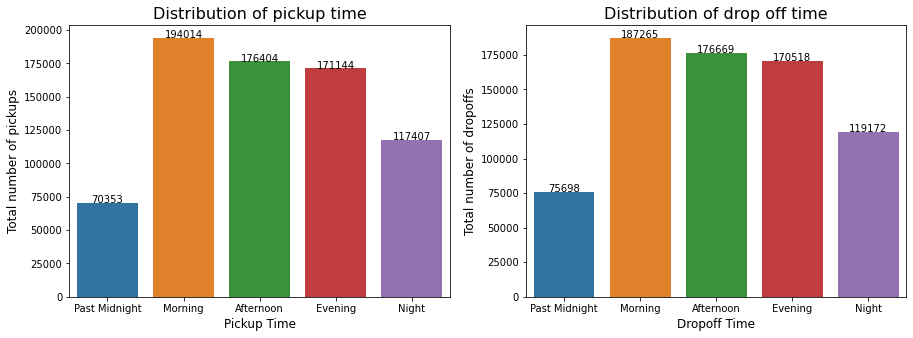

In [36]:
fig,ax= plt.subplots(nrows=1,ncols=2, figsize=(15,5))

sns.countplot(x='pickup_time',data=data,ax=ax[0])
ax[0].set_title('Distribution of pickup time',size=16)
ax[0].set_xlabel('Pickup Time',size=12) 
ax[0].set_ylabel('Total number of pickups',size=12)

for p in ax[0].patches:
    height= p.get_height()
    ax[0].text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))


sns.countplot(x='dropoff_time',data=data,ax=ax[1])
ax[1].set_title('Distribution of drop off time',size=16)
ax[1].set_xlabel('Dropoff Time',size=12) 
ax[1].set_ylabel('Total number of dropoffs',size=12)

for p in ax[1].patches:
    height= p.get_height()
    ax[1].text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))
    


The distribution of the pickup and dropoffs based on the times indicates that
--

--Most of the taxi trips are done in the evening followed by the morning and night time, this implies that most of the usage of NYC taxi could be done by the working class for their travel from home to work

Text(0, 0.5, 'Total number of dropoffs')

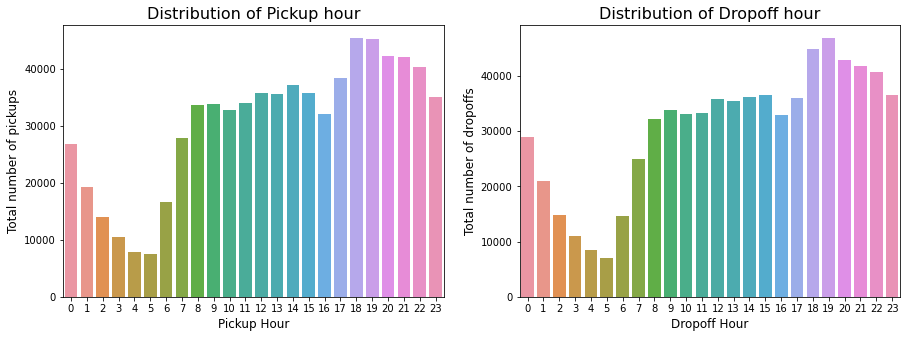

In [37]:
fig,ax= plt.subplots(nrows=1,ncols=2, figsize=(15,5))

sns.countplot(x='pickup_hour_of_day',data=data,ax=ax[0])
ax[0].set_title('Distribution of Pickup hour',size=16)
ax[0].set_xlabel('Pickup Hour',size=12) 
ax[0].set_ylabel('Total number of pickups',size=12)



sns.countplot(x='dropoff_hour_of_day',data=data,ax=ax[1])
ax[1].set_title('Distribution of Dropoff hour',size=16)
ax[1].set_xlabel('Dropoff Hour',size=12) 
ax[1].set_ylabel('Total number of dropoffs',size=12)




The distribution of pickup and drop off hours idicates that
--

The number of pickups and dropffs is the highest in the evening hours and the early morning(3 to 6 am) pickups and dropoffs number is much lower



In [38]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64

In [39]:
data['vendor_id'].value_counts()

vendor_id
2    390481
1    338841
Name: count, dtype: int64

In [40]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

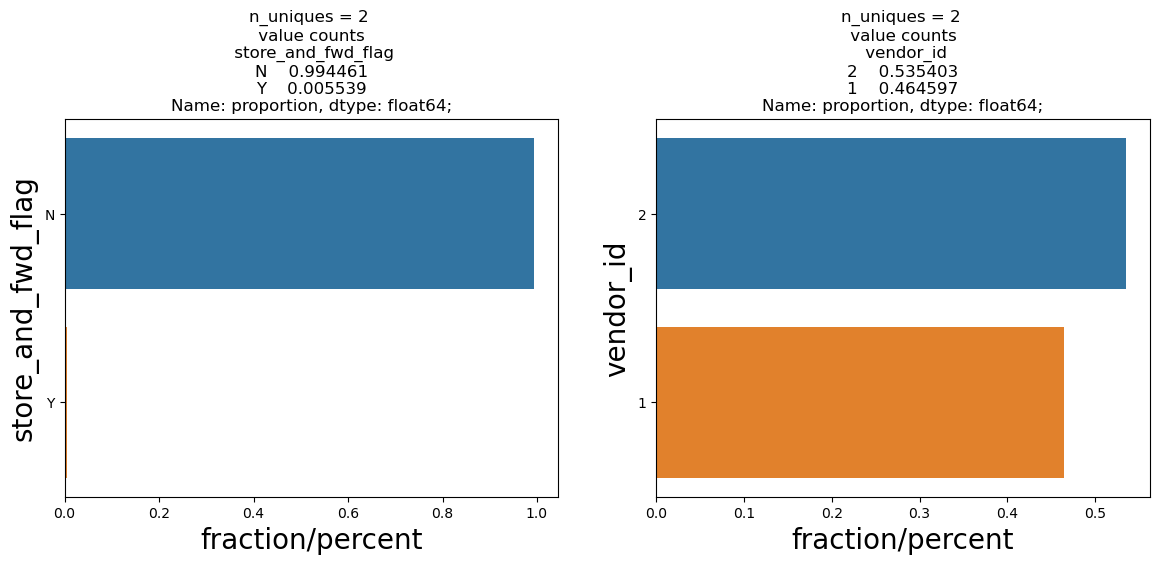

In [41]:
UVA_category(data,['store_and_fwd_flag','vendor_id'])

-The Ditribution of store_and_fwd_flag clearly indicates that almost all the trips didn't needed to store the trip record, thus we can say that there is a strong connectivity through almost all the trips


-On the other hand the distribution of vendor_id indicates that there is a strong cmpetitive performance between the 2 vendors wherein vendor with id 1 and 2 have 46.46% and 53.54% of distributuon


# Univariate Analysis

for numerical variables features

In [42]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",s=200)
    sns.scatterplot([mean], [0], color = 'red', label = "mean",s=200)
    sns.scatterplot([median], [0], color = 'blue', label = "median",s=200)
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

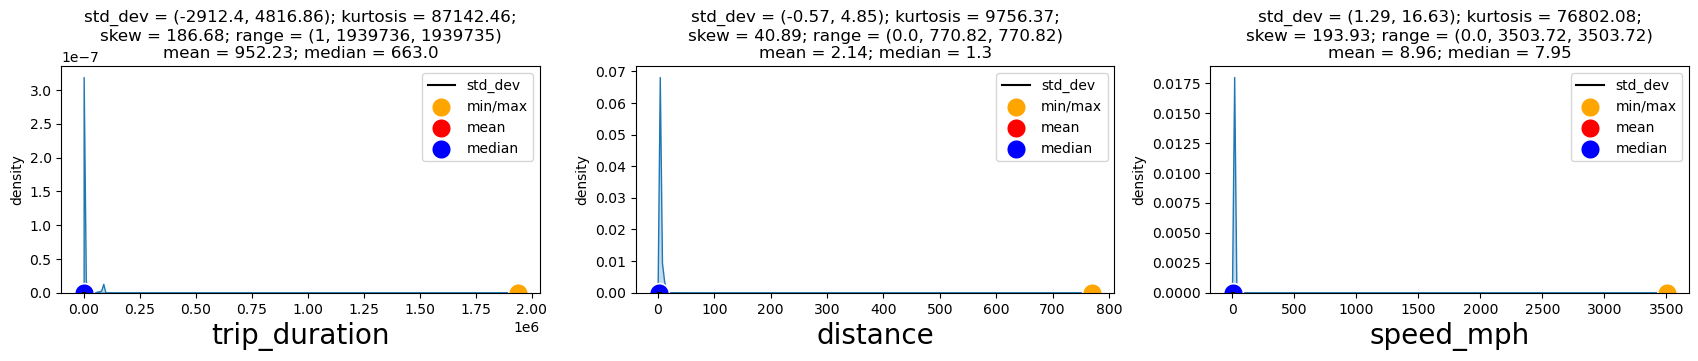

In [43]:
numerical=["trip_duration","distance","speed_mph"]
UVA_numeric(data,numerical)

From the above graphical representation of numerical features we can say that:
--

It contains quite a lot outliers as discussed earlier

The average trip_duration is around 952.23 seconds which is approxiamtely around 15 minutes 

Its also clear that this distribution does not follow a normal distribution as it has a high kurtosis and skew value

The skew value is a high positive value implying the data is right skewed which also means that we also have some long duration of trips as well

The longest duration of trip is around 1939736 seconds which is around 538 hours this states that we also have trips that involve days of duration

The distribution of ditanceand speed_mph also says the they are positively skewed data with a large outliers

These huge outliers could cause major problems during the prediction stage 

We can take a log transformed value of the above varibales so that we can visualise them better

In [44]:
data['log_trip_duration'] = np.log(data['trip_duration'].values)
data['log_distance'] = np.log(data['distance'].values + 1)
data['log_speed_mph'] = np.log(data['speed_mph'].values+1)


In [45]:
log_numerical=["log_trip_duration","log_distance","log_speed_mph"]

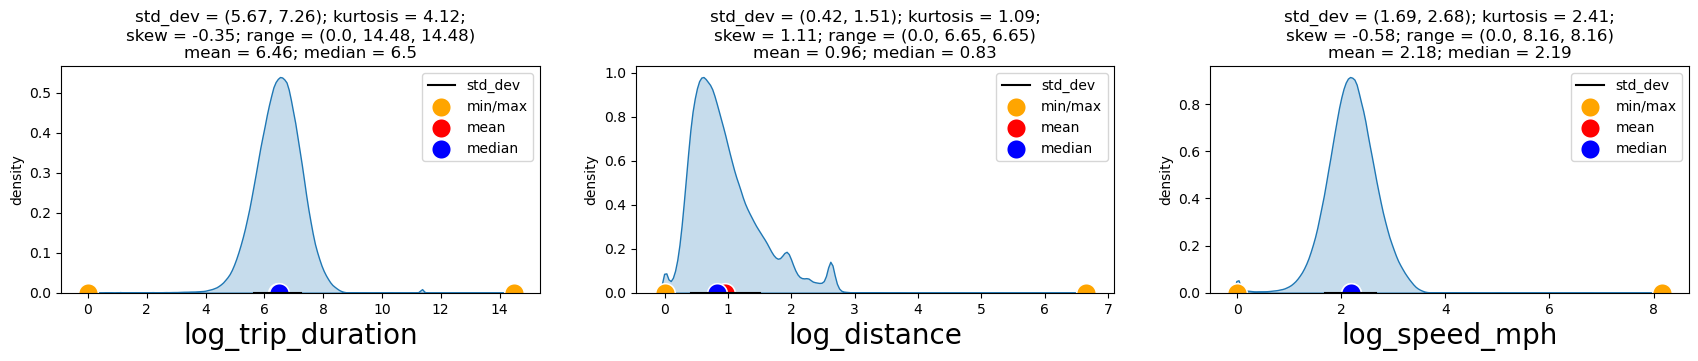

In [46]:
UVA_numeric(data,log_numerical)

The above distributions states that:
--
For trip_diration
-The majority of rides have a smooth distribution of trip duration
-The mean of the trip_duration is almost exp(6.5)seconds which is around 11 minutes and it contains many outliers i.e. from 0 seconds to exp(15)seconds which is around 908 hours

For distance
-The data is still a bit right skewed even after log transformation which means that the data mojorly involves long distance trips, it has a small peak around exp(2.5) as well
-The average distance is exp(0.96)miles that is around 2.61 miles

For speed
-The speed variable also have a smooth distribution  its extreme values are zero and approximately exp(8.1) 3294.45 mph which is suspiciously a lot a is a huge outlier
-There is a small peak around 0 as well

Lets have a look at other numerical feactures such as the latitudes and longitudes of the data
--

In [47]:
geocoordinates=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]

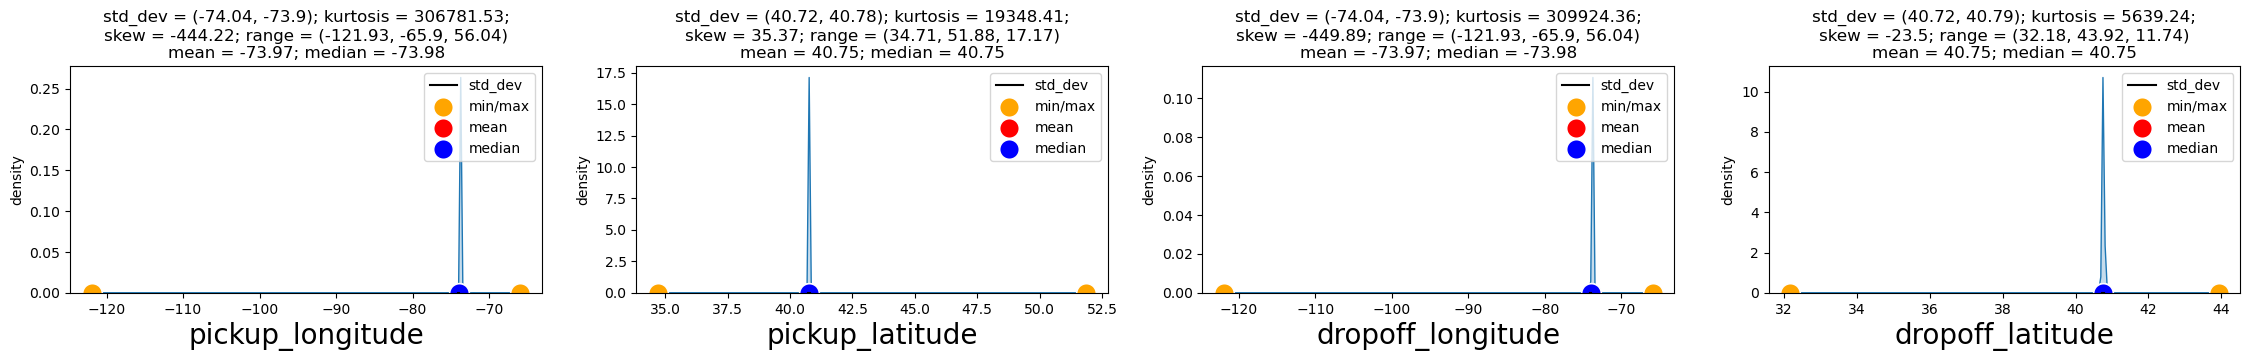

In [48]:
UVA_numeric(data,geocoordinates)

From the above plots we can say that
--
-The pickup and dropoff latitudes are highly clustered on a particular place

-All the variables have high skewness and kurtosis values

-Due to some extreme coordinates, the plot has been compressed, causing the spike

-So we can remove the outlier and take a look at it.



ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

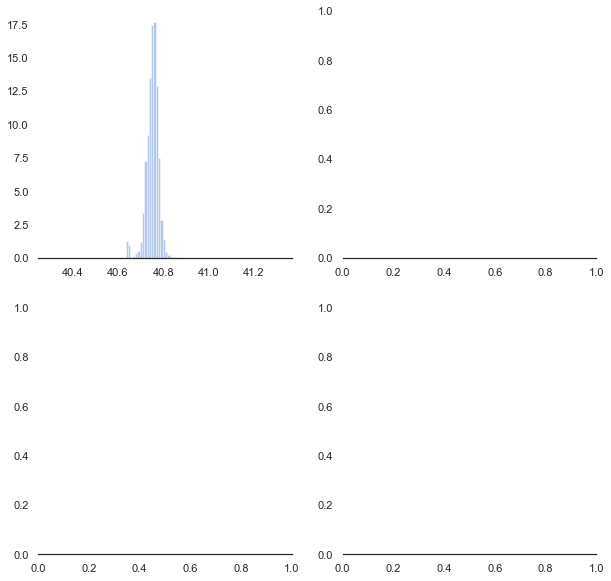

In [59]:
clean_data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
clean_data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
clean_data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
clean_data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
new_data = clean_data.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)

sns.despine(left=True)
sns.distplot(new_data['pickup_latitude'].values,color="b",bins = 100, ax=axes[0,0])
axes[0,0].set_title('Pickup latitude')


sns.distplot(new_data['pickup_longitude'].values,color="r",bins =100, ax=axes[0,1])
axes[0,1].set_title('Pickup longitude')



sns.distplot(new_data['dropoff_latitude'].values,color="b",bins =100, ax=axes[1, 0])
axes[1,0].set_title('Dropoff latitude')




sns.distplot(new_data['dropoff_longitude'].values, color="r",bins =100, ax=axes[1, 1])
axes[1,1].set_title('Dropoff longitude')



plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

-Now we have a better visualization of the coordinates that clearly states that the pickup and dropoff latitudes are cocentrated
between 40.5 and 41 and the pickup and dropoff longitudes are concentrated between -74 to -73.5

-We have a few small clusters other then that as well which can be seen in the visualisation in the form of small peaks

Bivariate Analysis
--

In [60]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_hour_of_day,dropoff_hour_of_day,distance,speed_mph,pickup_time,dropoff_time,log_trip_duration,log_distance,log_speed_mph
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2,16,16,0.745502,6.709522,Afternoon,Afternoon,5.991465,0.557042,2.042456
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,23,23,2.562501,8.386366,Night,Night,7.003065,1.270463,2.239258
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2,17,18,4.505212,9.919733,Evening,Evening,7.399398,1.705695,2.390571
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,9,10,1.465371,4.623433,Morning,Morning,7.039660,0.902342,1.726942
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,6,6,2.689391,11.417226,Morning,Morning,6.742881,1.305461,2.519085


Bivariate Analysis
--

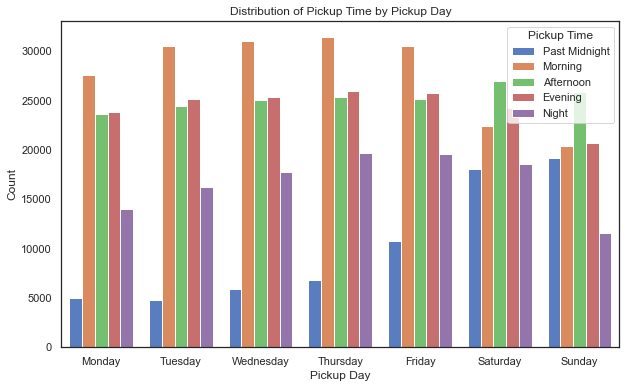

In [61]:
plt.figure(figsize=(10, 6))  # Set the figure size as desired

sns.countplot(x='pickup_day', hue='pickup_time', data=data, order=days_order)
plt.title('Distribution of Pickup Time by Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Count')
plt.legend(title='Pickup Time')
plt.show()


The trip counts based on time also changes for different days of the week

Past Midnight trips are the highest on the weekends whereas on weekdays the midnight trips are less

Similarly the morning trips which are consistently high throughout the week have less number of trips on the weekends

In [62]:
pivot_table = data.pivot_table(values='distance', index='passenger_count', aggfunc='sum')

pivot_table

,distance
passenger_count,
0,3.904704e+01
1,1.088487e+06
2,2.393473e+05
3,6.534431e+04
4,3.157320e+04
5,8.440798e+04
6,5.085549e+04
7,1.629317e-03
9,0.000000e+00


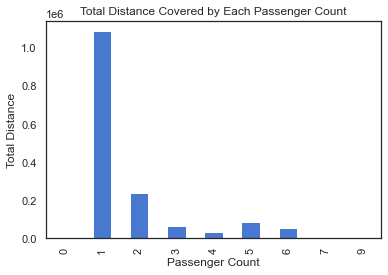

In [63]:
grouped = data.groupby('passenger_count')['distance'].sum()

ax=grouped.plot(kind='bar')

plt.xlabel('Passenger Count')
plt.ylabel('Total Distance')
plt.title('Total Distance Covered by Each Passenger Count')


plt.show()


The above graph clearly states that the solo trips have the highest of the distance travelled around 1088487 miles comapred to other passenger_counts

There are trips with 7 and 9 passengers but they are very low in numbers


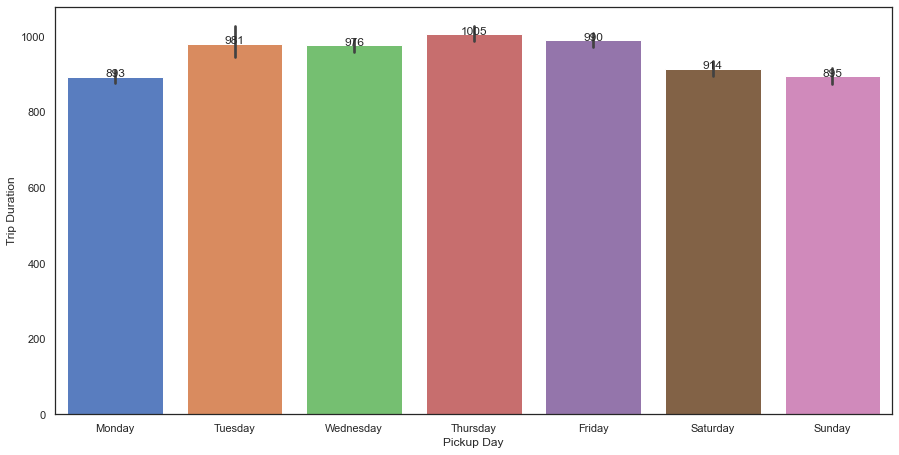

In [64]:

plt.figure(figsize = (15,7.5))
ax=sns.barplot(x="pickup_day", y="trip_duration",data=data,order=days_order)
ax.set_xlabel("Pickup Day")
ax.set_ylabel("Trip Duration")

for p in ax.patches:
    height= p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))
plt.show()


The above barplot states the following
--
The longest trip durations are done on Thurdays and Fridays

Each of the weekdays have quite number of outliers as all the bars show some error rates, out which Tuesday has the highest error
We can confirm this with help of boxplot

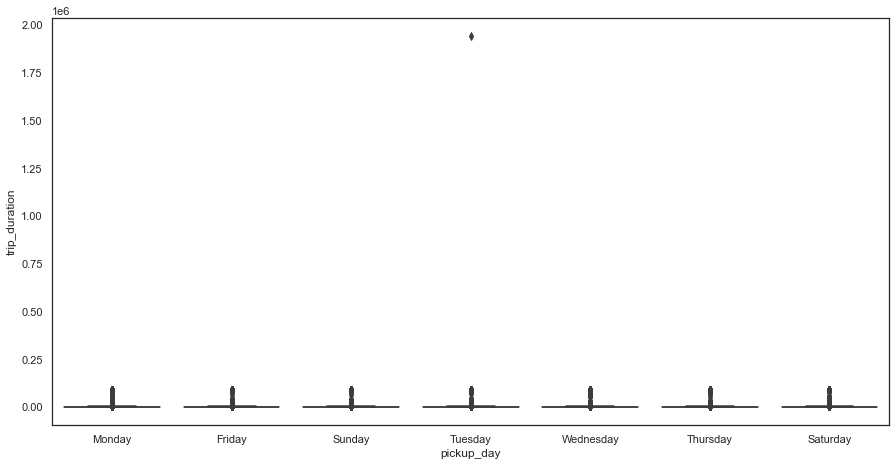

In [65]:
plt.figure(figsize = (15,7.5))
sns.boxplot(x="pickup_day", y="trip_duration",data=data)
plt.show()

The boxplot confirms that Tuesdays have quite a lot longer trips as compared to other days

The boxplot also depicts that most of the trips are done in less than 125,000 seconds or 3.47 hours we only have a handful of trips which have duration longer than a day



In [66]:
pivot_table = data.pivot_table(values='trip_duration', index='vendor_id', aggfunc='mean')

pivot_table

,trip_duration
vendor_id,
1,837.096021
2,1052.136219


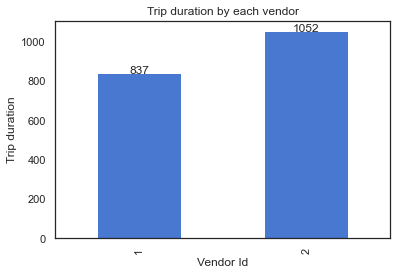

In [67]:
grouped = data.groupby('vendor_id')['trip_duration'].mean()

ax=grouped.plot(kind='bar')

plt.xlabel('Vendor Id')
plt.ylabel('Trip duration')
plt.title('Trip duration by each vendor')

for p in ax.patches:
    height= p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2), y= height+0.2, ha= 'center', s= '{:.0f}'.format(height))


plt.show()

The above bar plot clearly indicates that vendor_id 2 has longer trip durations as comapred to the other vendor

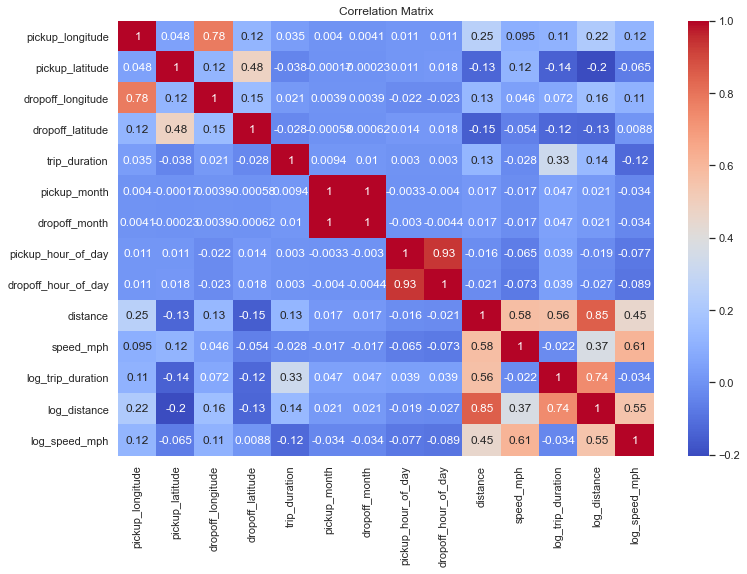

In [69]:
# correlation_matrix = data.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

numeric_columns = data.select_dtypes(include=[np.number])  # Select numeric columns only
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The Correlation matrix indicates that:
--
-Pickup and Dropoff longitude have strong correlation

-The pickup and dropoff latitudes have also have high correlation between them

-The log transformation of trip_duration and distance have strong correlation which should be obvious as the longer the trip_duration the distance will be more as well

-The speed_mph and distance variables have high correlation indicating that for longer distance the speed of the taxis increases
same is the case for log_speed_mph and log_distance variables as well



Conclusions:
--
The maximum number of trips are include just a single passenger

The month of March and April have the highest number of trips, the dataset also contains a few dropoffs in the month of July as well

Maximum number of trips are done on weekends i.e. Fridays and Saturdays, Sundays have less number of trips

The number of pickups and dropffs is the highest in the evening hours and the early morning(3 to 6 am) pickups and dropoffs number is much lower

Almost all tghe trips had a better connectivity throughout the journey

Vendor with Id 2 has more number of trips as compared to Vendor 1

The variables trip_duration, distance and speed have a lot of outliers but results in a smooth dsitrubution when perfomed log transformation on them

The pickup and dropoff latitudes are located between 40 and 41 and the longitudes are between -74 and -73.

Past Midnight trips are the highest on the weekends whereas on weekdays the midnight trips are less, the morning trips which are consistently high throughout the week have less number of trips on the weekends

Highest distance of travels are done by solo trips

Thursdays and Fidays have the longest trip durations, Tuesday have a quite a long trips as compared to other trips

Vendor 2 has have high trip durations then Vendor 1

The geocoordinates such as pickup and dropoff latitudes and pickup and dropoff longitudes have high correlation

The log transformation of trip_duration and distance have strong correlation

The speed and distance of the taxi trips are also strongly correlated



In [70]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_hour_of_day,dropoff_hour_of_day,distance,speed_mph,pickup_time,dropoff_time,log_trip_duration,log_distance,log_speed_mph
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2,16,16,0.745502,6.709522,Afternoon,Afternoon,5.991465,0.557042,2.042456
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,23,23,2.562501,8.386366,Night,Night,7.003065,1.270463,2.239258
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2,17,18,4.505212,9.919733,Evening,Evening,7.399398,1.705695,2.390571
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,9,10,1.465371,4.623433,Morning,Morning,7.039660,0.902342,1.726942
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,6,6,2.689391,11.417226,Morning,Morning,6.742881,1.305461,2.519085


In [71]:
# Assuming your DataFrame is named 'data'
data.to_csv('data_after_EDA.csv', index=False)
